# 05: Solution

### Notebook accompanying  the [Scientific Computing Lecture HS 2019](https://dmi.unibas.ch/de/studium/computer-science-informatik/lehrangebot-hs19/main-lecture-scientific-computing/)
#### Tutorial by [Sebastian Mathias Keller](http://bmda.cs.unibas.ch/)
#### University of Basel [Institute for Mathematics and Computer Science](http://informatik.unibas.ch/)

## 5.1 Geometric Approach

1     -2.0000   5.9489
2     -1.7895   4.8710
3     -1.5789   4.2316
4     -1.3684   3.3974
5     -1.1579   2.0662
6     -0.9474   1.8298
7     -0.7368   1.1973
8     -0.5263   1.1172
9     -0.3158   0.9621
10    -0.1053   0.6710
11     0.1053  -0.5260
12     0.3158  -0.1774
13     0.5263  -0.8564
14     0.7368  -0.7507
15     0.9474  -0.0533
16     1.1579   0.9491
17     1.3684   0.1193
18     1.5789   1.0998
19     1.7895   1.3000
20     2.0000   2.5587
Name: #     x        y, dtype: object
-----------------d


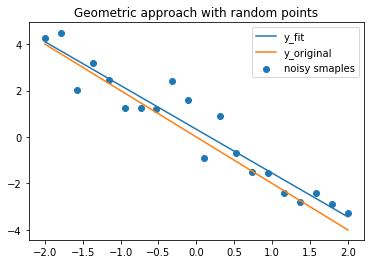

In [2]:
%matplotlib inline

# Least Squares -- Geometric Approach

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from numpy.linalg import *
import pandas as pd




df = pd.read_csv('data2.dat')
x = df.iloc[1:,0]
#y = df.iloc[1:,1]

print(x)
print("-----------------d")

filename = 'data.dat'
infile = open(filename, 'r')
line = infile.readline()
x_data = []
y_data = []
for line in infile:
    words = line.split()
    x_data.append(float(words[0]))
    y_data.append(float(words[1]))
infile.close()

# number of samples
n = len(x_data)

# convienient rename...
x = x_data
y = y_data



# we generate m samples (x, y) from function y = 2 * x + noise
#x = np.linspace(-2, 2, m)
#noise_amp = 1
#nn = noise_amp * random.randn(n)
#y_data = y_data# + (0.5 * nn)



# compute matrix A and vector c
a11 = np.dot(x,x)
a12 = np.dot(x,np.ones(n)) # identical to a21
a22 = n
A = np.matrix([[a11, a12], [a12, a22]])

c1 = np.dot(x,y)
c2 = np.dot(y,np.ones(n))
c = np.matrix([[c1], [c2]])

# solve  A * b = c  using any method you learned so far (Gauss-Jordan, LU, SVD, ...)
U, S, Vt = np.linalg.svd(A, full_matrices=True)

S_matrix = np.zeros((2,2))
S_matrix[0,0] = 1/S[0]
S_matrix[1,1] = 1/S[1]
S_plus = S_matrix.T

# pseudosolution based on constructed S_plus
b = Vt.T.dot(S_plus).dot(U.T).dot(c)

# plotting...
fig = plt.figure()
plt.title('Geometric approach with random points')

# plot scatter
plt.scatter(x,y, label='noisy smaples')
# plot fit
x = np.arange(-2,2.2,0.2)
y = b[0,0]*x + b[1,0]
plt.plot(x, y, '-', label='y_fit')
# plot noisefree original
y_orig = -2*x + 0
plt.plot(x, y_orig, '-', label='y_original')

plt.legend()

plt.show()